# Bonus - DeeDee Walker

In [1]:
import pandas as pd

In [2]:
restaurant = pd.read_csv('https://raw.githubusercontent.com/ddwalk77/608-mod6/main/Restaurant_Scores_-_LIVES_Standard.csv',
                         dtype={0:'object',12:'Int64',17:'object',18:'object',19:'object',20:'object',21:'object'})

- converted dtypes on import

In [3]:
pd.set_option('display.precision', 2)

- set precision

In [4]:
restaurant.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,NaN,NaN,NaN,1.42e+10,...,100,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,37.73,-122.42,POINT (-122.419253 37.729016),1.42e+10,...,<NA>,Reinspection/Followup,NaN,NaN,NaN,92,92,2,2,7
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,<NA>,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,37.76,-122.41,POINT (-122.410351 37.763156),NaN,...,<NA>,Reinspection/Followup,NaN,NaN,NaN,53,53,3,2,20
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,NaN,NaN,NaN,NaN,...,96,Routine - Unscheduled,97722_20181217_103154,Unclean or degraded floors walls or ceilings,Low Risk,NaN,NaN,NaN,NaN,NaN


In [5]:
restaurant.columns = ['ID', 'Name', 'Address', 'City', 'State', 'Zip', 'Latitude', 'Longitude', 'Location', 'Phone', 'Inspection_Id', 'Inspection_Date', 'Score', 'Inspection_Type', 'Violation_Id',
                      'Violation_Description', 'Risk_Category', 'Neighborhoods', 'SF_Find_Neighborhoods', 'Current_Police_Districts', 'Current_Supervisor_Districts', 'Analysis_Neighborhoods']

- rename column 

#### DeeDee Walker Bonus

In [6]:
restaurant['Phone'] = restaurant['Phone'].astype(str).replace('\.0','',regex=True)

- convert phone number to string and remove decimal and trailing 0's

In [7]:
restaurant.head()

,ID,Name,Address,City,State,Zip,Latitude,Longitude,Location,Phone,...,Score,Inspection_Type,Violation_Id,Violation_Description,Risk_Category,Neighborhoods,SF_Find_Neighborhoods,Current_Police_Districts,Current_Supervisor_Districts,Analysis_Neighborhoods
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,NaN,NaN,NaN,14155775000,...,100,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,37.73,-122.42,POINT (-122.419253 37.729016),14155464722,...,<NA>,Reinspection/Followup,NaN,NaN,NaN,92,92,2,2,7
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,NaN,NaN,NaN,nan,...,<NA>,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,37.76,-122.41,POINT (-122.410351 37.763156),nan,...,<NA>,Reinspection/Followup,NaN,NaN,NaN,53,53,3,2,20
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,NaN,NaN,NaN,nan,...,96,Routine - Unscheduled,97722_20181217_103154,Unclean or degraded floors walls or ceilings,Low Risk,NaN,NaN,NaN,NaN,NaN


- convert phone number to standard phone format

In [8]:
import re

In [9]:
def get_formatted_phone(value):
    result = re.fullmatch(r'(\d{1})(\d{3})(\d{3})(\d{4})', value)
    return '-'.join(result.groups()) if result else value

In [10]:
formatted_phone = restaurant['Phone'].map(get_formatted_phone)

In [11]:
formatted_phone #once confirmed corrected then can load

0        1-415-577-5000
1        1-415-546-4722
2                   nan
3                   nan
4                   nan
              ...      
53968    1-415-529-7665
53969    1-415-583-5001
53970               nan
53971    1-415-581-6395
53972               nan
Name: Phone, Length: 53973, dtype: object

In [12]:
restaurant['Phone'] = formatted_phone

In [13]:
restaurant.head() #to check if the phone # was loaded

,ID,Name,Address,City,State,Zip,Latitude,Longitude,Location,Phone,...,Score,Inspection_Type,Violation_Id,Violation_Description,Risk_Category,Neighborhoods,SF_Find_Neighborhoods,Current_Police_Districts,Current_Supervisor_Districts,Analysis_Neighborhoods
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,NaN,NaN,NaN,1-415-577-5000,...,100,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,37.73,-122.42,POINT (-122.419253 37.729016),1-415-546-4722,...,<NA>,Reinspection/Followup,NaN,NaN,NaN,92,92,2,2,7
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,NaN,NaN,NaN,nan,...,<NA>,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,37.76,-122.41,POINT (-122.410351 37.763156),nan,...,<NA>,Reinspection/Followup,NaN,NaN,NaN,53,53,3,2,20
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,NaN,NaN,NaN,nan,...,96,Routine - Unscheduled,97722_20181217_103154,Unclean or degraded floors walls or ceilings,Low Risk,NaN,NaN,NaN,NaN,NaN


In [14]:
restaurant['Score'].describe()

count    39541.00
mean        86.22
std          8.49
min         45.00
25%         81.00
50%         87.00
75%         92.00
max        100.00
Name: Score, dtype: float64

In [15]:
%matplotlib widget

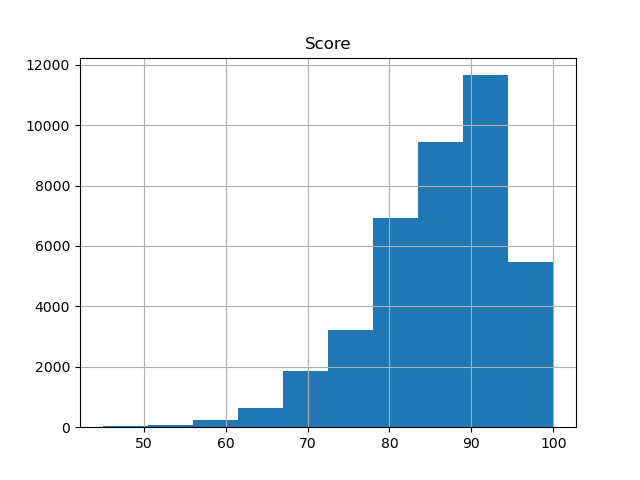

In [16]:
histogram = restaurant.hist("Score")